In [540]:
import pandas as pd
from ast import literal_eval

pitch_symbol = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

df = pd.read_csv("songs.csv")
# ignore songs that have no tags
df = df[df["tags"].notna()]

# turn tags from strings into a list of strings
df["artist_genres"] = df["artist_genres"].apply(literal_eval)
df["tags"] = df["tags"].apply(literal_eval)
df.columns

Index(['Unnamed: 0', 'key', 'tags', 'duration', 'liveness', 'valence',
       'artist_genres', 'mode', 'danceability', 'artist_names',
       ...
       'B_90', 'B_91', 'B_92', 'B_93', 'B_94', 'B_95', 'B_96', 'B_97', 'B_98',
       'B_99'],
      dtype='object', length=1241)

In [541]:
df.iloc[:20, :25]

Unnamed: 0   key  \
0   005lwxGU1tms6HGELIcUv9   5.0   
1   00B7TZ0Xawar6NZ00JFomN   9.0   
2   00GOPLxW4PGQuUYdPJh8K1   1.0   
3   00Mb3DuaIH1kjrwOku9CGU   0.0   
4   00R0fEFZGb5hyTgF1nrRCq   0.0   
5   00SiZEELZ0K4gkUl0rU529   0.0   
6   00YwKTnP2LKlNPa8Pe1jz2   9.0   
7   00i2HU7TEzzftShjRrDSEF   7.0   
8   00r40cNOJTjlNw5cG4ADHf   4.0   
9   00tK6fhN3nwFrpQy3flNei   7.0   
10  00vk0sEfb6mr2ehwSw0Uhn   8.0   
11  00xjXIoyDIQYSYve03VsXf   2.0   
12  017PF4Q3l4DBUiWoXk4OWT   4.0   
13  01QBOmO4SBmJS1vVy4S0Ya   7.0   
14  01UYpHuzHi4eB9PAbDoPY2   5.0   
15  01z2fBGB8Hl3Jd3zXe4IXR   2.0   
16  021JldNpXGATNSC69edcBT  11.0   
17  02TmyBZCgcVihv9PVK9Mw2   0.0   
18  02Yvc2BUfBJAOoEJoagqtE   9.0   
19  02bJ6uGeHKfNOhIc9qyA8e   5.0   

                                                 tags  duration  liveness  \
0   [i killed a bird and i lyked it, dancing songs...    179640    0.1320   
1   [rap, hip-hop, underground hip-hop, chicago, c...    284855    0.3140   
2   [psychedelic hip-hop, childish gambino, hip ho...    180675    0.6430   
3   [skate punk, Energetic, canada, bubblegum, gui...    204000    0.3580   
4   [california, west coast hip hop, hip hop, jazz...    248810    0.6800   
5                     [canada, hip-hop, rap, hip hop]    113996    0.1100   
6   [classical, female vocalists, early music, cho...    211707    0.0691   
7                          [rock, 90s, 00s, american]    268960    0.1400   
8   [heart, live, late 70s, temp, lucipro, the eve...    319533    0.1200   
9                [classic rock, hard rock, 80s, rock]    234200    0.3190   
10  [summer, soul, c best, c nilanti, gostoso, K R...    192226    0.3970   
11                              [synth funk, nu jazz]    252016    0.1220   
12  [2010s, rnb influences, great quality stuff, m...    221820    0.3490   
13  [2000s, SUN, new romantic, downloaded, electro...    205466    0.1400   
14  [male vocalists, drums, smooth, guilty pleasur...    205480    0.0764   
15  [rnb, Neo Soul, mellow, pbrnb, Neo-Soul, 10s, ...    161840    0.2750   
16  [album rock, male vocalists, radio paradise, r...    499115    0.1420   
17                    [canada, hip-hop, rap, hip hop]    157674    0.0660   
18  [2020s, shoegaze, rock, 2022, dream pop, summe...    174627    0.3250   
19  [2020s, Garage Rock, linedance 2022, rock, 202...    164866    0.0398   

    valence                                      artist_genres  mode  \
0    0.6960                                   [dance pop, pop]   1.0   
1    0.6650  [chicago rap, hip hop, pop, rap, dance pop, po...   1.0   
2    0.5810                        [atl hip hop, rap, hip hop]   0.0   
3    0.4840  [canadian pop, pop, dance pop, candy pop, post...   1.0   
4    0.6810  [hip pop, hip hop, rap, east coast hip hop, ha...   1.0   
5    0.3530  [minnesota hip hop, dark trap, vapor trap, can...   1.0   
6    0.0395  [early music choir, early music ensemble, chor...   1.0   
7    0.3160  [hip hop, west coast rap, rap, gangster rap, g...   1.0   
8    0.4200  [album rock, heartland rock, classic rock, new...   1.0   
9    0.5890  [metal, british blues, album rock, glam metal,...   1.0   
10   0.9130  [russian dance, russian pop, russian edm, fren...   0.0   
11   0.2300                         [filter house, indie soul]   0.0   
12   0.4670                           [dance pop, uk pop, pop]   0.0   
13   0.4650  [dance rock, new wave, new romantic, pop rock,...   0.0   
14   0.3180  [album rock, classic rock, singer-songwriter, ...   1.0   
15   0.1190                     [rap, pittsburgh rap, hip hop]   0.0   
16   0.0754  [album rock, classic rock, rock, yacht rock, s...   0.0   
17   0.5690  [minnesota hip hop, dark trap, vapor trap, can...   0.0   
18   0.2740  [shoegaze, dreamo, toronto indie, indie pop, i...   1.0   
19   0.9570  [modern rock, rock, blues rock, alternative ro...   0.0   

    danceability                             artist_names  ...  \
0          0.699                           ['Katy Perry']  ...

# Data Visualization

## Spotify Features

Here we plot the correlation matrix of the features we selected from the spotify api.

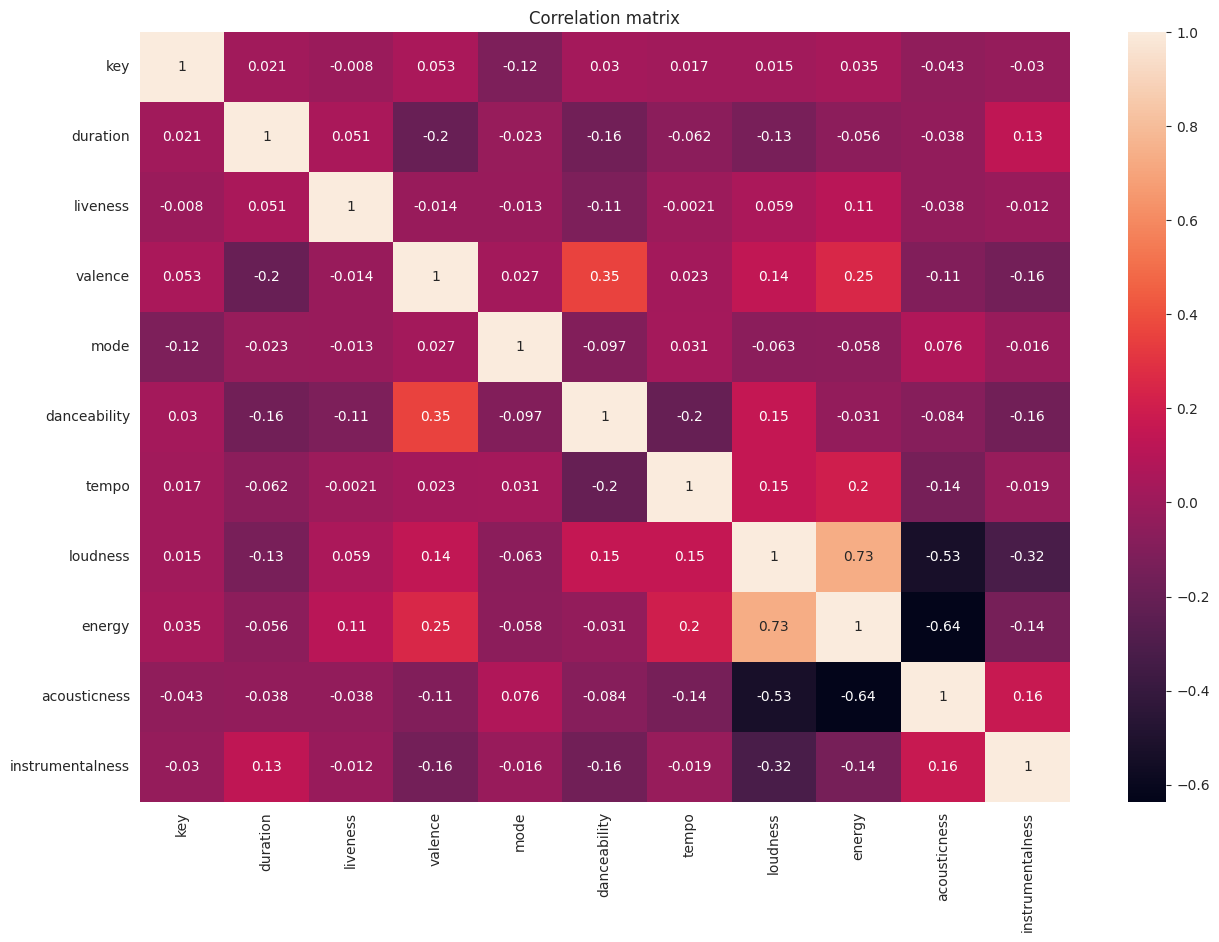

In [542]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df.iloc[:, :16].corr(numeric_only=True), annot=True)
plt.title("Correlation matrix")
plt.show()

We only plot the spotify features here, since we have way too many columns.
This is because we decided to use the pitches of every note as a feature. The problem is, that the amount of pitches is proportional to the length
of the song. To reduce the amount of features, we preprocessed the pitches per note down to 100 values per note. Though this still leaves us with around 1240 feature columns.


In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3620 entries, 0 to 3690
Columns: 1241 entries, Unnamed: 0 to B_99
dtypes: float64(1235), int64(1), object(5)
memory usage: 34.3+ MB


## Pitches

Since we have over ~100 different tags, we decided to take a closer look at the following tags, to
 get some sense fo our features, we decided to take a closer look at 5 different tags.


In [544]:
df_by_tags = {
    "rock": df[df["tags"].apply(lambda x: "rock" in x)],
    "metal": df[df["tags"].apply(lambda x: "metal" in x)],
    "hip hop": df[df["tags"].apply(lambda x: "hip hop" in x)],
    "jazz": df[df["tags"].apply(lambda x: "jazz" in x)],
    "electro": df[df["tags"].apply(lambda x: "electro" in x)],
    "indie": df[df["tags"].apply(lambda x: "indie" in x)],
    "edm": df[df["tags"].apply(lambda x: "edm" in x)],
    "classic": df[df["tags"].apply(lambda x: "classic" in x)],
    "piano": df[df["tags"].apply(lambda x: "piano" in x)],
}

rock_df = df_by_tags["rock"]

### Rock

Here we check if the correlation matrix of just the songs tagged with `rock` is different from the correlation matrix of all songs.
But as we can see, it looks pretty much the same.

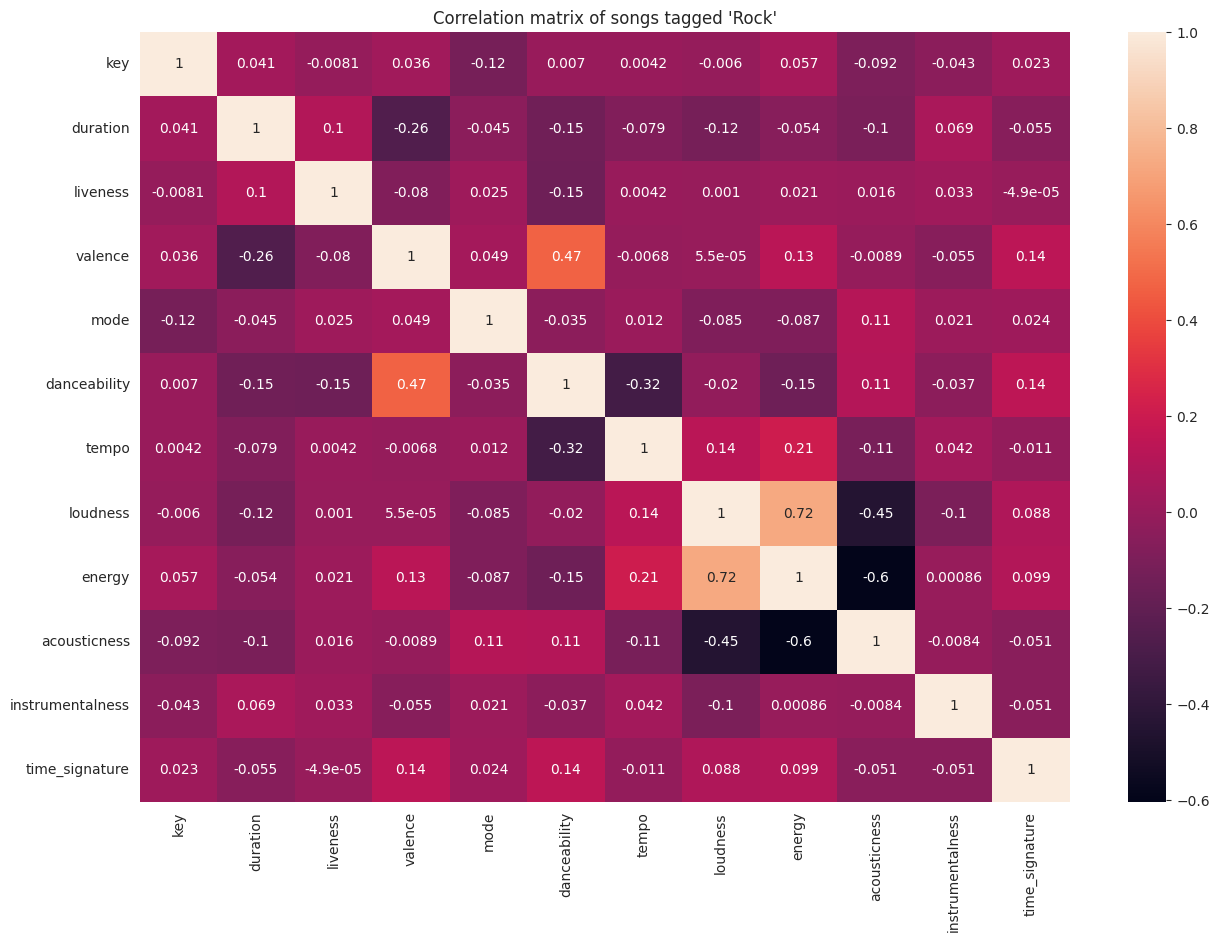

In [545]:
plt.figure(figsize=(15, 10))
sns.heatmap(rock_df.iloc[:, :17].corr(numeric_only=True), annot=True)
plt.title("Correlation matrix of songs tagged 'Rock'")
plt.show()

This plot show the avg pitches of the songs tagged with `rock`.

Text(0.5, 1.0, "Avg pitches for songs tagged with 'rock'")

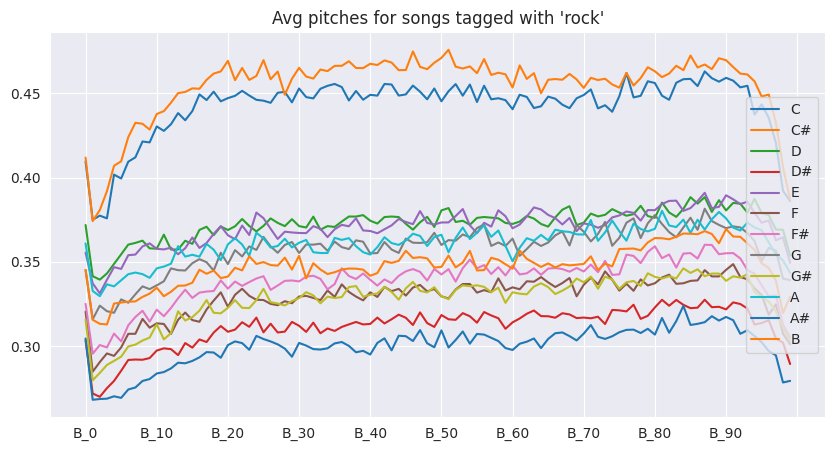

In [546]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_xticks(range(0, 101, 10))
#ax.set_xticklabels([i for i in range(0, 101, 10)])
for i, note in enumerate(pitch_symbol):
    #cur_ax.set_title(note)
    curr_df = rock_df[[*[note + "_" + str(i) for i in range(0, 100)]]].mean().transpose()
    curr_df.plot(ax=ax)
ax.legend(pitch_symbol, loc="center right")
ax.set_title("Avg pitches for songs tagged with 'rock'")

## Plots per tag
### Pitches

In order to compare the information above with other tags, we decided to plot the pitches separately and use the tags as the legend.

And as we can see from the averages, `edm` is very different from the other tags. The `metal` tag has a very strong presents in E and B

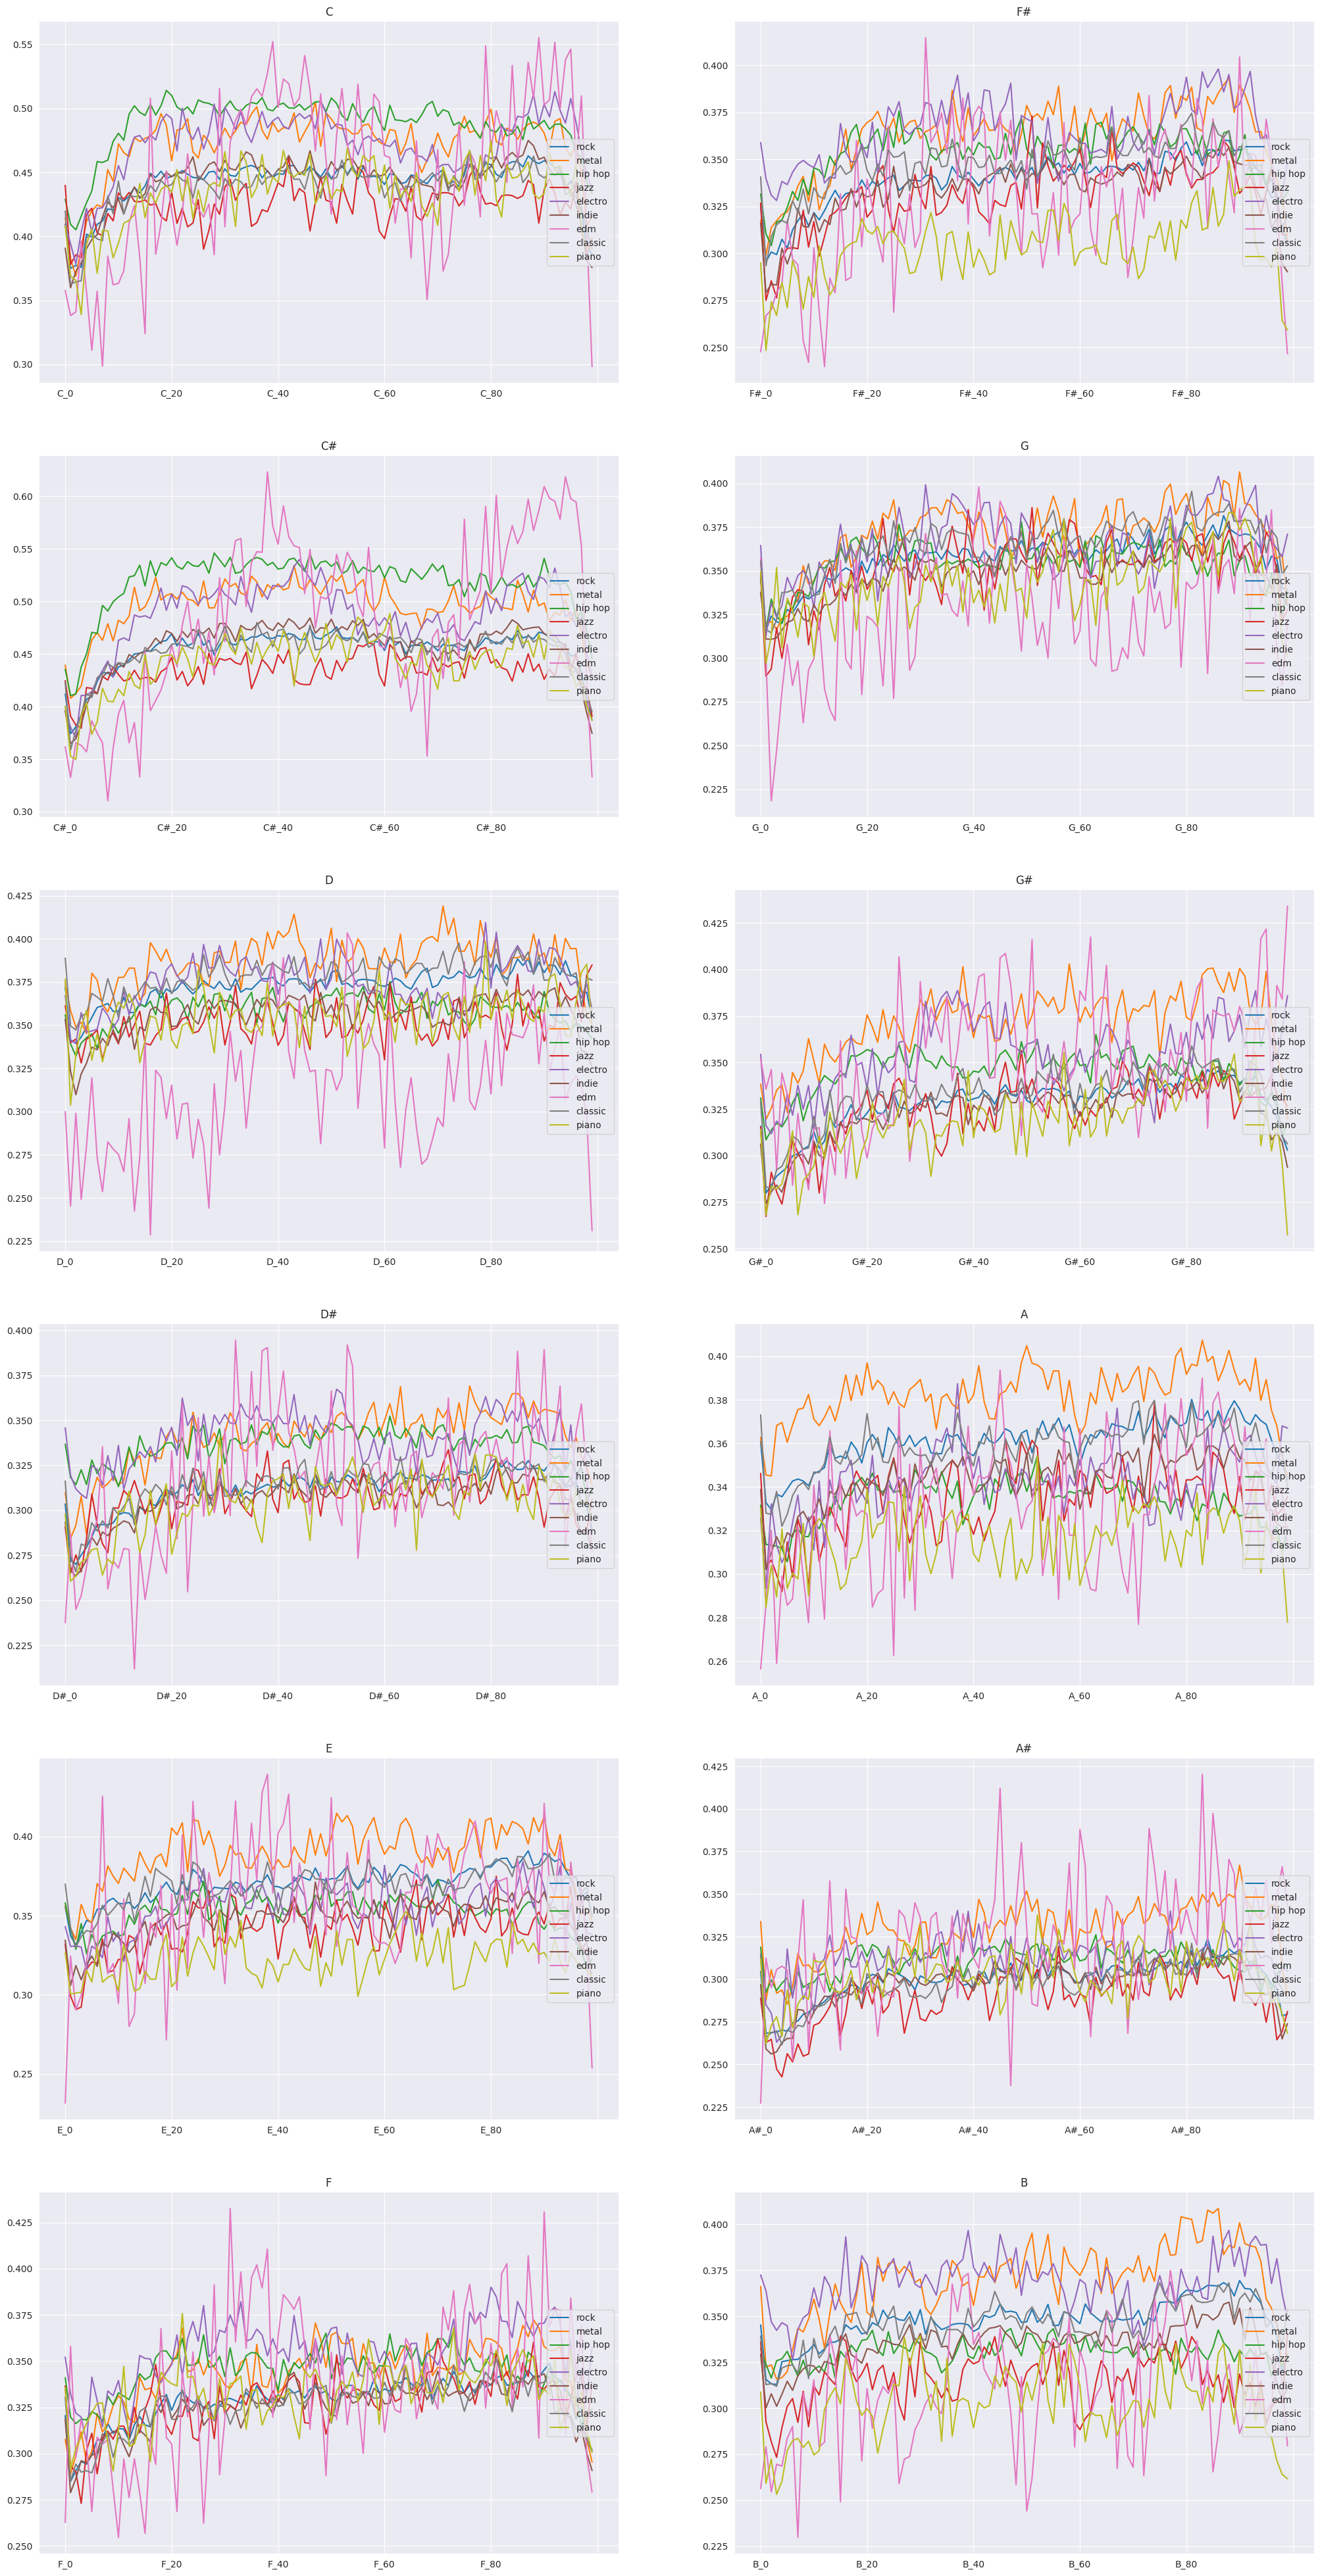

In [547]:
fig, ax = plt.subplots(len(pitch_symbol) // 2, 2, figsize=(25, 50))

for i, note in enumerate(pitch_symbol):
    cur_ax = ax[i % (len(pitch_symbol) // 2)][i // (len(pitch_symbol) // 2)]
    cur_ax.set_title(note)
    cur_ax.legend([*df_by_tags.keys()])
    for key, val in df_by_tags.items():
        curr_df = val[[*[note + "_" + str(i) for i in range(0, 100)]]].mean().transpose()
        curr_df.plot(ax=cur_ax, legend=False)

for i in ax:
    for axis in i:
        axis.legend([*df_by_tags.keys()], loc="center right")

## Spotify features

Here we decided to check if we could maybe differentiate our selected tags by plotting the boxplot of the spotify features for our selected tags.
But as we can see, most of them have a high spread and overlap, so we do not think that they are very helpful.

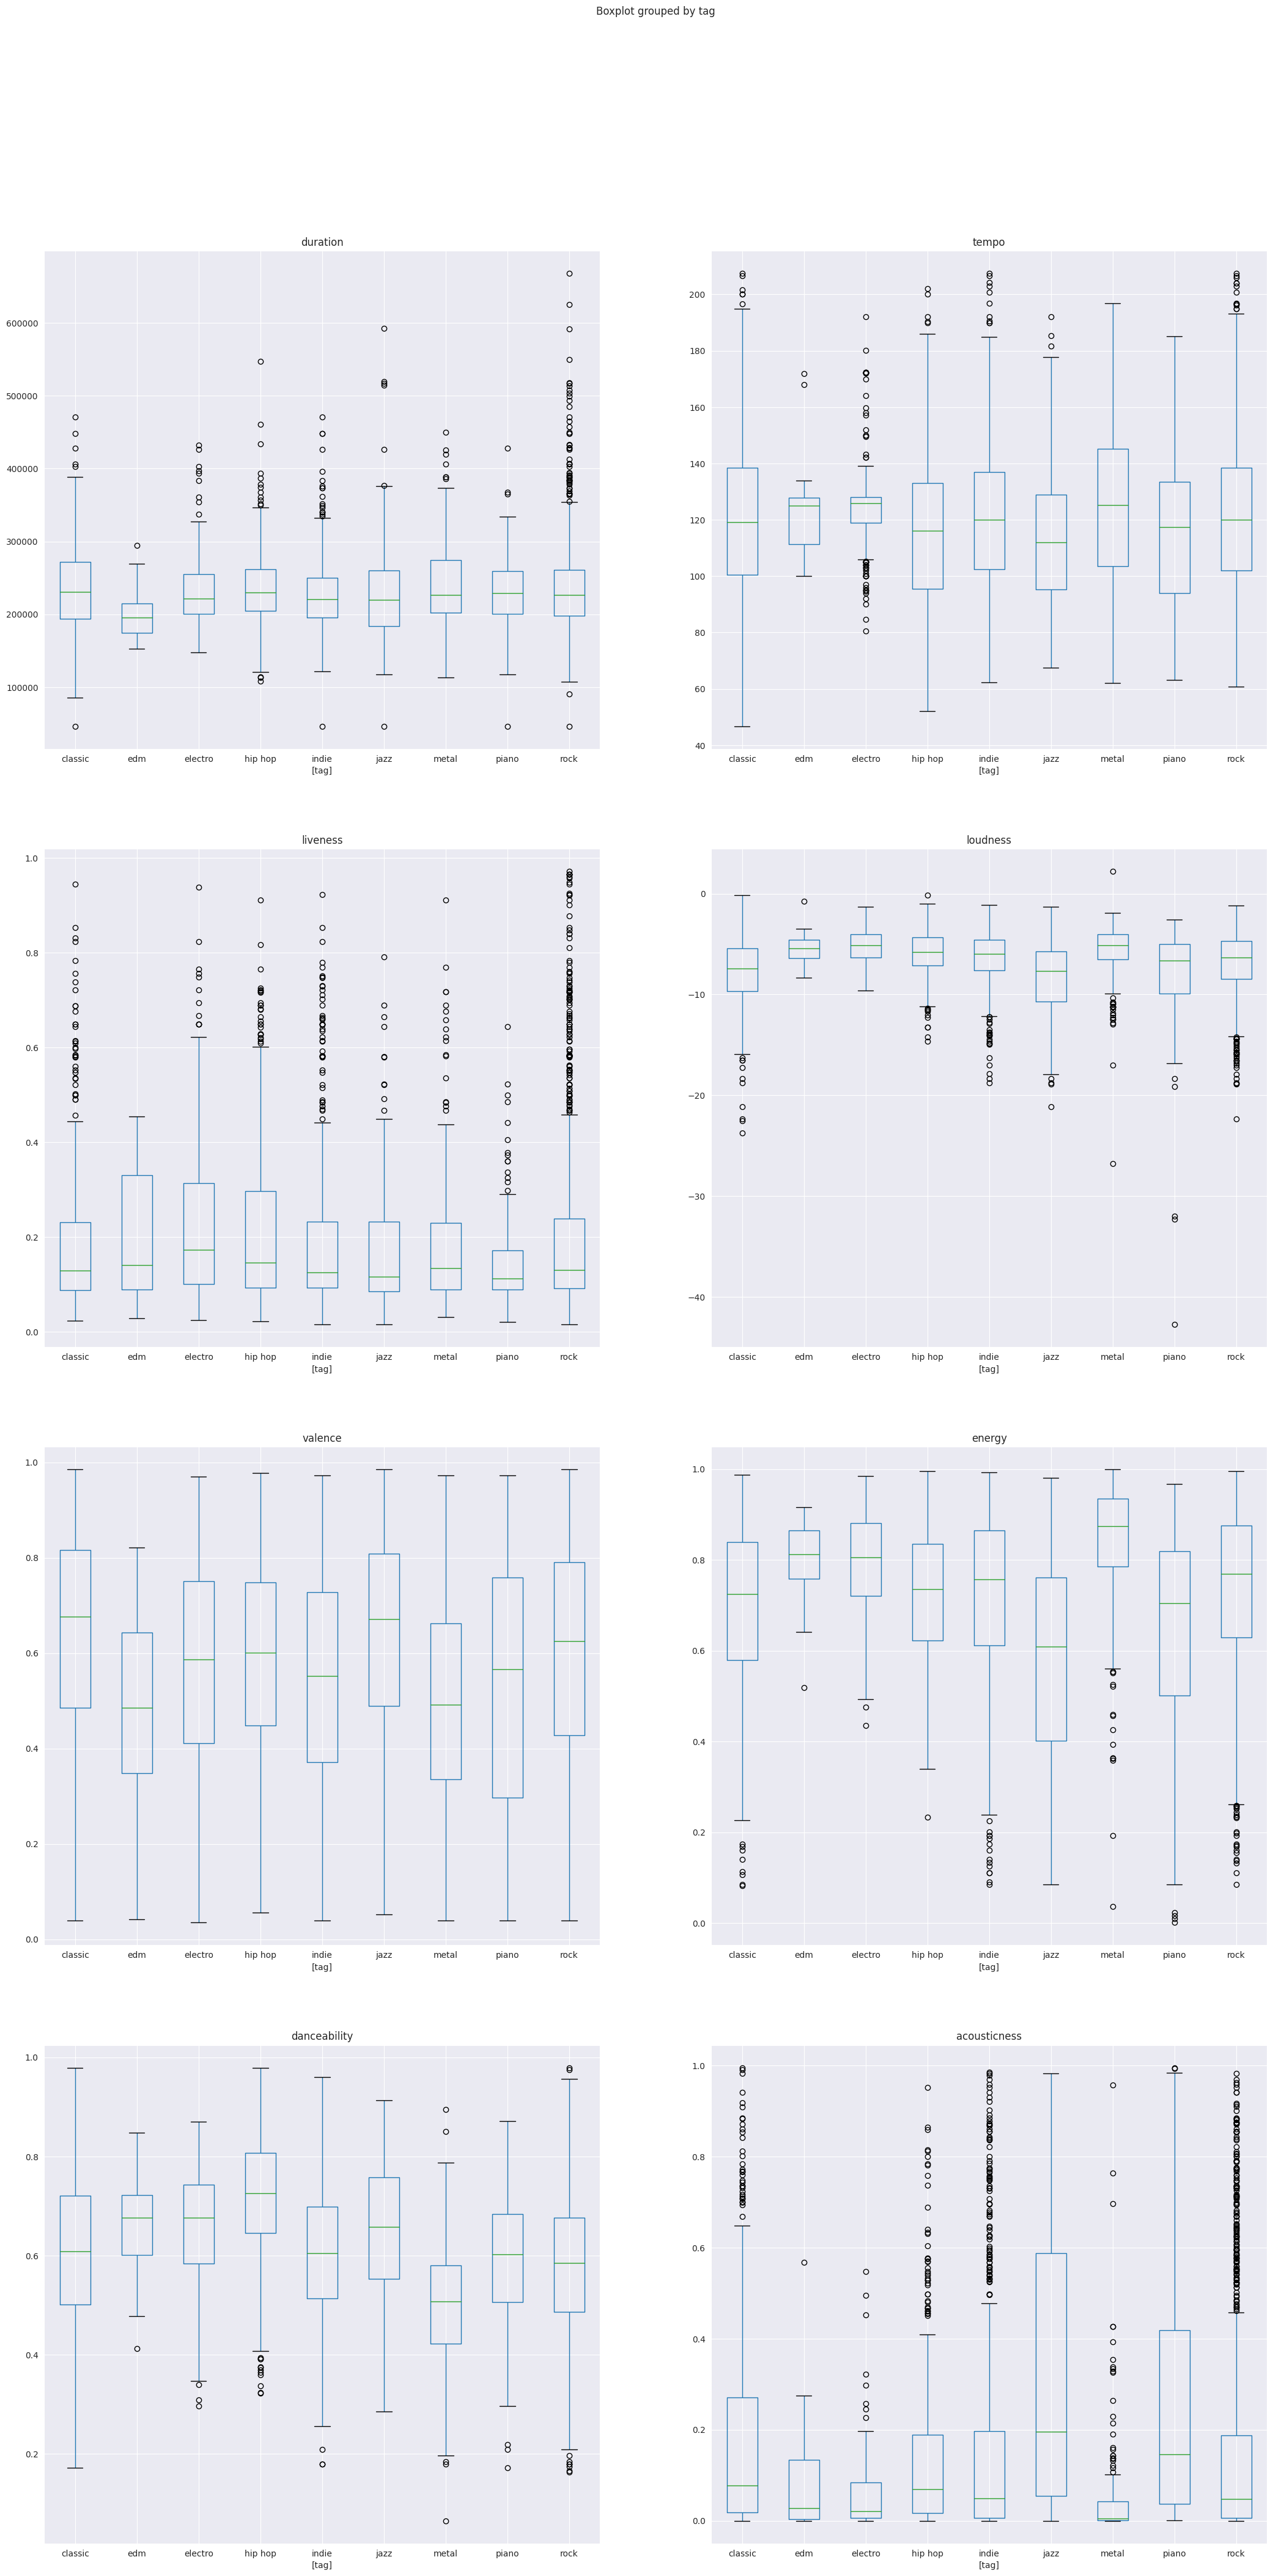

In [548]:
spotify_features = ['duration', 'liveness', 'valence', 'danceability', 'tempo', 'loudness', 'energy',
                    'acousticness']

fig, ax = plt.subplots(len(spotify_features) // 2, 2, figsize=(25, 50))

spotify_feature_df = pd.concat([
    df_by_tags["rock"].assign(tag="rock"),
    df_by_tags["metal"].assign(tag="metal"),
    df_by_tags["hip hop"].assign(tag="hip hop"),
    df_by_tags["jazz"].assign(tag="jazz"),
    df_by_tags["electro"].assign(tag="electro"),
    df_by_tags["indie"].assign(tag="indie"),
    df_by_tags["edm"].assign(tag="edm"),
    df_by_tags["classic"].assign(tag="classic"),
    df_by_tags["piano"].assign(tag="piano"),
])

for i, feature in enumerate(spotify_features):
    cur_ax = ax[i % (len(spotify_features) // 2)][i // (len(spotify_features) // 2)]
    cur_ax.set_title(feature)
    spotify_feature_df[["tag", feature]].boxplot(ax=cur_ax, by="tag")

## Songs per Tag

By counting the number of times a tag appears, we can see that we have an incredibly imbalanced dataset.
We think that this will mean that our classifier will try to tag most things with pop as it is by far the tag that appears the most often.
In the plot we already decided to filter out all tags that appear less than 250 times as they add no real information to the graph.

<class 'pandas.core.series.Series'>
Index: 23980 entries, pop to Soft jazz
Series name: None
Non-Null Count  Dtype
--------------  -----
23980 non-null  int64
dtypes: int64(1)
memory usage: 374.7+ KB

Top 20 appearing genres
pop                 1731
rock                1447
american             974
alternative          953
favorites            932
dance                928
male vocalists       865
Love                 784
electronic           741
Awesome              737
indie                728
party                704
alternative rock     697
rap                  642
classic rock         637
pop rock             607
catchy               598
chill                575
rnb                  575
Favorite             570
dtype: int64


Text(0.5, 1.0, 'Number of songs tagged with x')

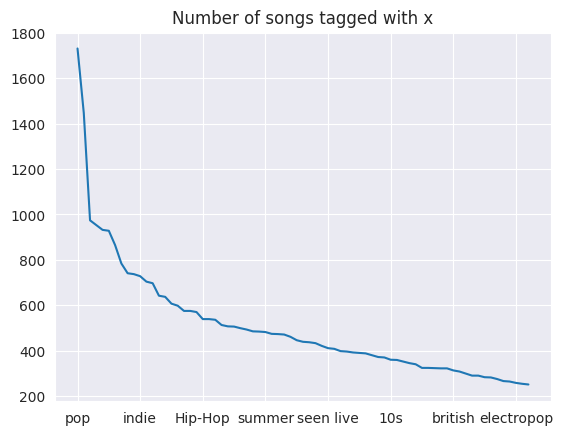

In [549]:
flatmap = lambda list_of_lists: [item for l in list_of_lists for item in l]
tags = pd.Series(flatmap(df["tags"].values.tolist()))
counts = tags.value_counts()
counts.info()
print()
print("Top 20 appearing genres")
print(counts[:20])
counts[counts > 250].plot()
plt.title("Number of songs tagged with x")

# Feature Selection

In [550]:
df = df.iloc[:, 1:]  # drop id

In [551]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()

y = multilabel_binarizer.fit_transform([*df['tags']])
# y = multilabel_binarizer.transform(df['tags'])

mba = MultiLabelBinarizer()
mba.fit(df['artist_genres'])
artist_genres = mba.transform(df['artist_genres'])

X = df.drop(columns=['tags', 'artist_names', 'name', "artist_genres"])
#for index, item in enumerate(artist_genres):
#    X['artist_genres'].iloc[index] = item
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=234634754)  # 70/30 split
X

key  duration  liveness  valence  mode  danceability    tempo  \
0      5.0    179640    0.1320    0.696   1.0         0.699  129.996   
1      9.0    284855    0.3140    0.665   1.0         0.620  167.911   
2      1.0    180675    0.6430    0.581   0.0         0.710   80.027   
3      0.0    204000    0.3580    0.484   1.0         0.487  149.937   
4      0.0    248810    0.6800    0.681   1.0         0.600   77.896   
...    ...       ...       ...      ...   ...           ...      ...   
3686  10.0    203040    0.1190    0.289   1.0         0.621   99.953   
3687   0.0    215204    0.0881    0.428   0.0         0.730  125.960   
3688   1.0    158800    0.5430    0.788   1.0         0.660  110.743   
3689   2.0    212493    0.1010    0.382   1.0         0.700  110.015   
3690   8.0    200626    0.1060    0.679   1.0         0.526  156.848   

      loudness  energy  acousticness  ...      B_90      B_91      B_92  \
0       -3.173   0.760      0.002230  ...  0.423800  0.358250  0.325286   
1       -7.438   0.625      0.287000  ...  0.109167  0.360357  0.459800   
2       -9.330   0.470      0.154000  ...  0.247000  0.885750  0.278500   
3       -4.417   0.900      0.000068  ...  0.258800  0.337375  0.378429   
4       -4.345   0.887      0.043800  ...  0.230333  0.278400  0.158778   
...        ...     ...           ...  ...       ...       ...       ...   
3686    -6.941   0.417      0.288000  ...  0.069200  0.366400  0.042400   
3687    -4.314   0.804      0.026500  ...  0.479800  0.429556  0.157125   
3688    -9.597   0.557      0.158000  ...  0.199000  0.180600  0.304800   
3689    -2.133   0.887      0.084300  ...  0.020000  0.302250  0.032429   
3690   -13.797   0.299      0.941000  ...  0.096300  0.238167  0.182444   

          B_93      B_94      B_95      B_96      B_97      B_98      B_99  
0     0.302333  0.143286  0.361429  0.526833  0.350286  0.201286  0.284500  
1     0.359000  0.406364  0.682875  0.467000  0.664700  0.579636  0.709000  
2     0.457000  0.340429  0.424167  0.507143  0.414750  0.427375  0.439667  
3     0.198333  0.112000  0.380600  0.701250  0.322400  0.225250  0.044500  
4     0.255900  0.260917  0.230545  0.284077  0.431111  0.211375  0.401667  
...        ...       ...       ...       ...       ...       ...       ...  
3686  0.104833  0.040333  0.056000  0.351000  0.326667  0.371333  0.741667  
3687  0.324200  0.493091  0.315182  0.294556  0.341444  0.535333  0.181333  
3688  0.248250  0.237400  0.226800  0.279500  0.292200  0.529800  0.230500  
3689  0.104778  0.080125  0.095800  0.158111  0.094778  0.178556  0.072333  
3690  0.125143  0.102833  0.077300  0.129429  0.172500  0.093500  0.066625  

[3620 rows x 1236 columns]

In [552]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca

array([[ 2.83352068e+04, -1.05702606e+01, -5.79751176e+00, ...,
        -1.69855787e-02, -4.73675302e-02,  1.13465921e-01],
       [ 2.87255206e+05,  1.08342154e+01, -5.35677292e+00, ...,
        -5.37011058e-01, -5.15581210e-01,  2.83843245e-01],
       [ 2.92372054e+04,  2.59169090e+01,  3.11833408e+00, ...,
        -1.93491982e-01, -9.58753327e-02,  1.53466822e-01],
       ...,
       [-2.17987932e+04, -1.01703120e+01,  3.97265161e-01, ...,
         1.64970376e-01, -4.67492367e-01,  1.75230117e-01],
       [ 2.68952067e+04, -7.35696965e+00, -7.49089593e-01, ...,
        -1.90063938e-01, -1.01241029e-01, -6.40484334e-02],
       [-5.31527937e+04,  2.53784809e+00,  1.17748859e+00, ...,
        -1.85387751e-01, -1.14736885e-01,  2.89907479e-01]])

In [553]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

clr = KNeighborsClassifier(n_jobs=-1, n_neighbors=15)

clr.fit(X_train_pca, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=15)

In [554]:
y_pred = clr.predict(X_test_pca)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [555]:
for i, song in enumerate(y_pred):
    print(multilabel_binarizer.inverse_transform(song))
    # print(df.loc[X_test.index[i]]["name"])
    # for i in range(0, len(song)):
    #     if y_pred[0][i] > 0.1:
    #         print("\t", multilabel_binarizer.classes_[i], ":", y_pred[0][i])

IndexError: tuple index out of range

In [557]:
y_pred_2 = clr.predict_proba(X_test_pca)

In [567]:
np.argmax(y_pred_2, axis=1)

ValueError: could not broadcast input array from shape (1086,2) into shape (1086,)

In [562]:
import numpy as np

predicted_binarized_values = np.argmax(y_pred_2, axis=2)
predicted_labels = multilabel_binarizer.inverse_transform(predicted_binarized_values)
print(predicted_binarized_values)

ValueError: could not broadcast input array from shape (1086,2) into shape (1086,)

In [559]:
for i in y_pred:
    print(multilabel_binarizer.inverse_transform(i))

IndexError: tuple index out of range

In [ ]:
for i, song in enumerate(y_pred):
    print(df.loc[X_test.index[i]]["name"])
    for i in range(0, len(song)):
        if y_pred[0][i][1] > 0.1:
            print("\t", multilabel_binarizer.classes_[i], ":", y_pred[0][i])

In [ ]:
X_test.index[1086]

In [ ]:
df.loc[1086]["name"]

In [ ]:
len(X_test)

In [ ]:
len(y_pred)

In [ ]:
len(multilabel_binarizer.classes_)